In [1]:
# imports
import matplotlib.pyplot as plt
# import pydicom
import pydicom.data
from pydicom.uid import RLELossless
from pydicom import dcmread
import pylibjpeg
import csv
import os
import numpy as np
import pylab as pl
from pathlib import Path

In [2]:
# small functions
def file_name_cut(path):
    return Path(path).stem

def list_filter(list, suffix, data_group):
    list_out = []
    for item in list:
        if item.endswith(suffix) and data_group in item:
            list_out.append(item)
    return list_out

def find_meta(meta_data_list, input):
    for entry in meta_data_list[1:]:
        if entry[2] == input:
            return entry

def boolean_string(string):
    if(string == "1"):
        return "True"
    else:
        return "False"

# def rgb2gray(rgb):
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
#     return gray

In [3]:
# fractal dimention calculatior. Works with png files 
def fractal_count(input_image):
    # image=rgb2gray(input_image) #image is already grayscale
    image = input_image
    # finding all the non-zero pixels
    pixels=[]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>0:
                pixels.append((i,j))
    
    Lx=image.shape[1]
    Ly=image.shape[0]
    # print (Lx, Ly)
    pixels=pl.array(pixels)
    # print (pixels.shape)
    
    # computing the fractal dimension
    #considering only scales in a logarithmic list
    scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)
    Ns=[]
    # looping over several scales skip for now
    for scale in scales:
        # print ("======= Scale :",scale)
        # computing the histogram
        H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
        Ns.append(np.sum(H>0))
    
    # linear fit, polynomial of degree 1
    coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
    
    pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
    pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
    pl.xlabel('log $\epsilon$')
    pl.ylabel('log N')
    pl.savefig('sierpinski_dimension.pdf')
    
    print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient
    return -coeffs[0]

In [4]:
# image dataset import
base = r"C:\Users\zdimi\Documents\MSc\Extracurricular\KTHAIS\Breast_cancer\toy_data"

filelist = pydicom.data.data_manager.get_files(base)
dataset = "train"
imagelist = list_filter(filelist, "dcm", dataset)
csv_data = list_filter(filelist, "csv", dataset)[0]

with open(csv_data, newline = '') as csv_data:
   meta_data = list(csv.reader(csv_data)) 
meta_data[1:].sort(key = lambda x: x[2])
meta_data_header = meta_data[0]


cancer: False
patient_id: 10048


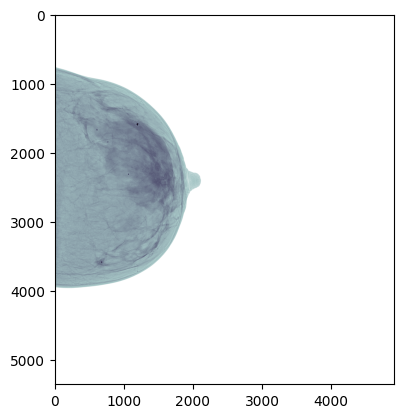

cancer: False
patient_id: 10048


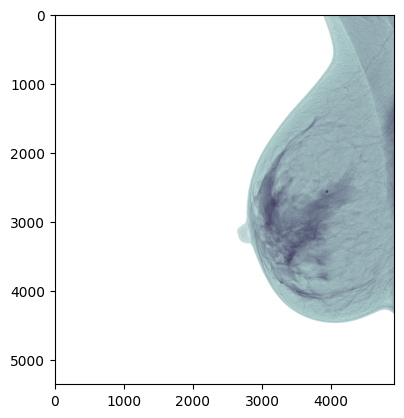

cancer: False
patient_id: 10048


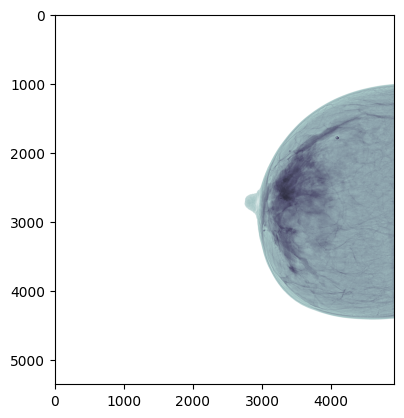

cancer: False
patient_id: 10048


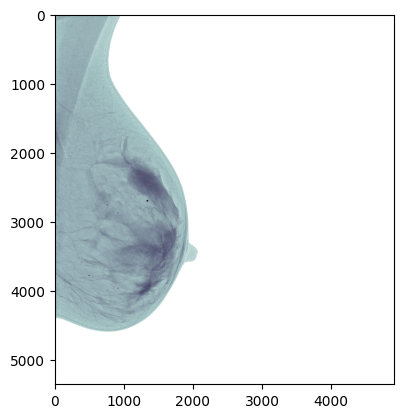

cancer: True
patient_id: 10589


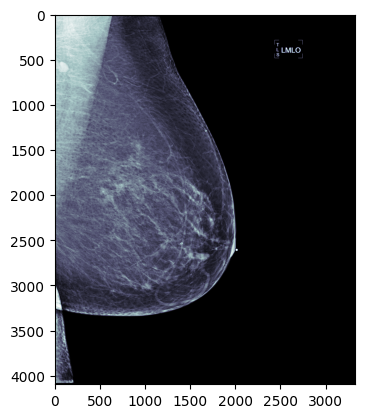

cancer: True
patient_id: 10589


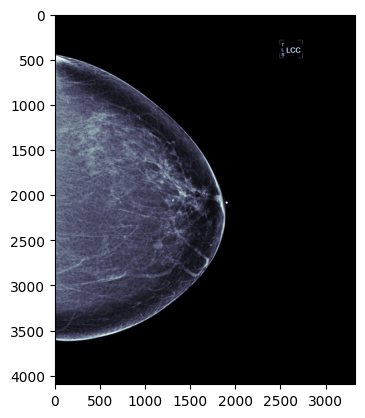

cancer: False
patient_id: 10589


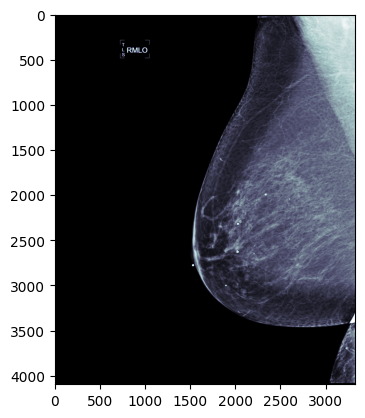

cancer: False
patient_id: 10589


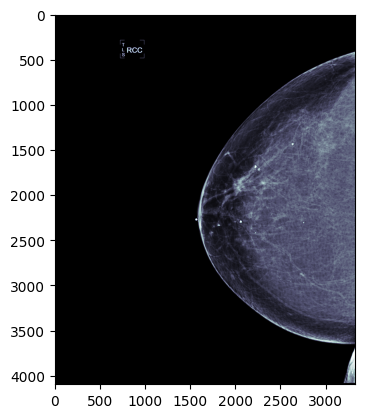

cancer: True
patient_id: 10589


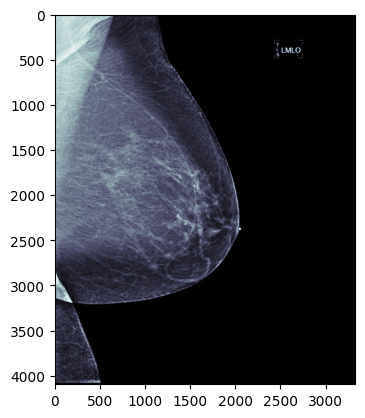

cancer: False
patient_id: 10736


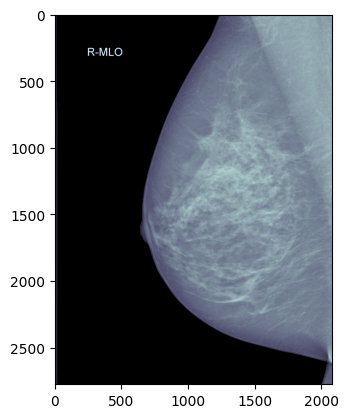

cancer: False
patient_id: 10736


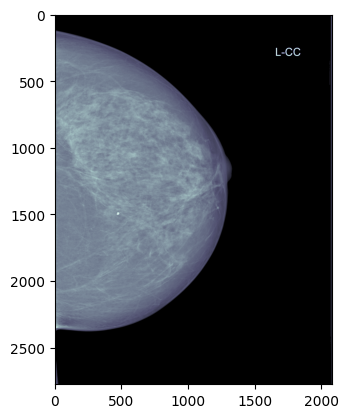

cancer: False
patient_id: 10736


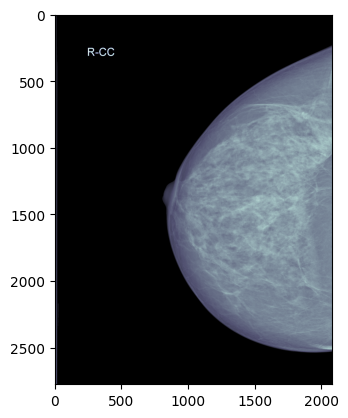

cancer: False
patient_id: 10736


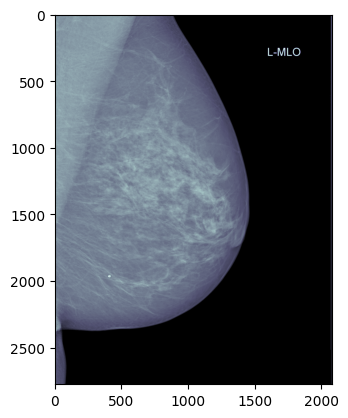

cancer: False
patient_id: 13563


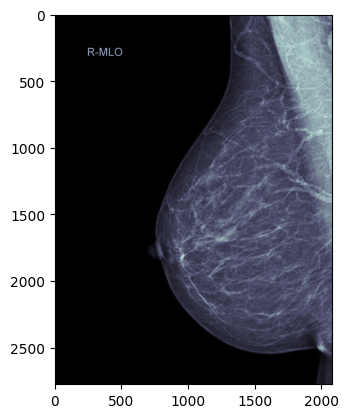

cancer: False
patient_id: 13563


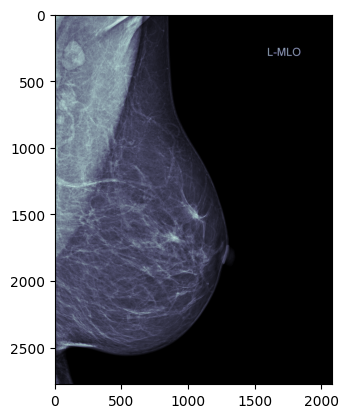

cancer: False
patient_id: 13563


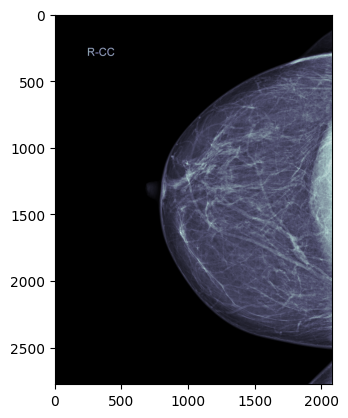

cancer: False
patient_id: 13563


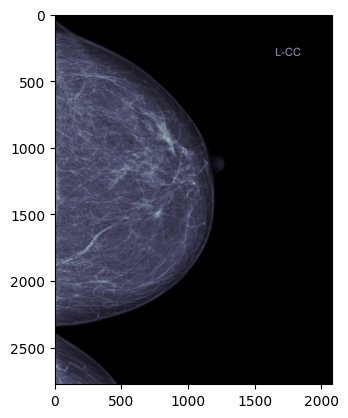

cancer: False
patient_id: 13579


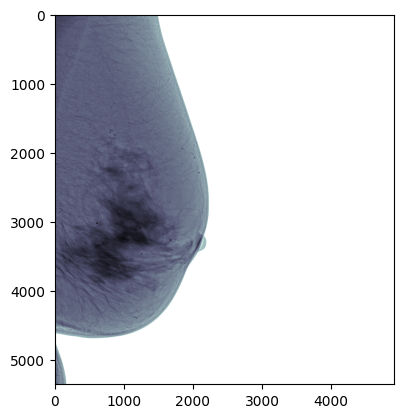

cancer: False
patient_id: 13579


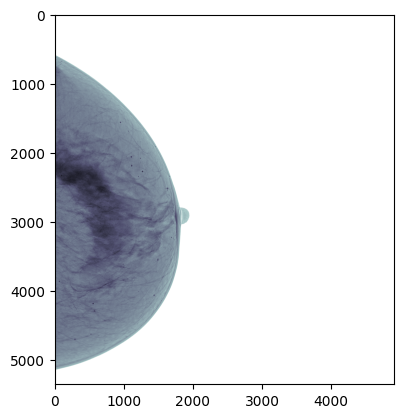

cancer: False
patient_id: 13579


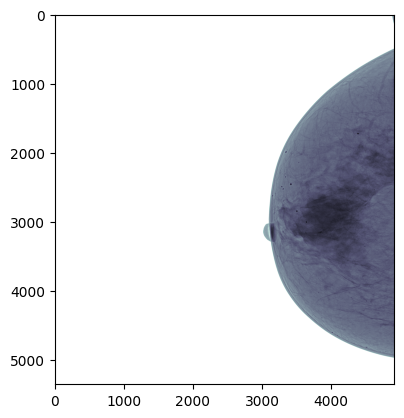

cancer: False
patient_id: 13579


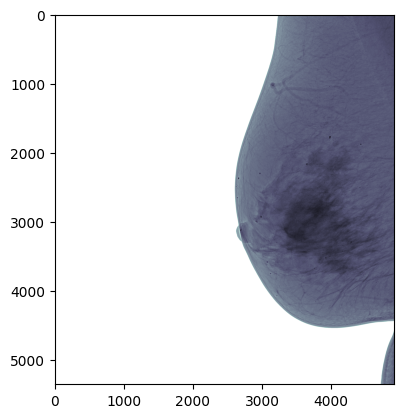

cancer: False
patient_id: 1468


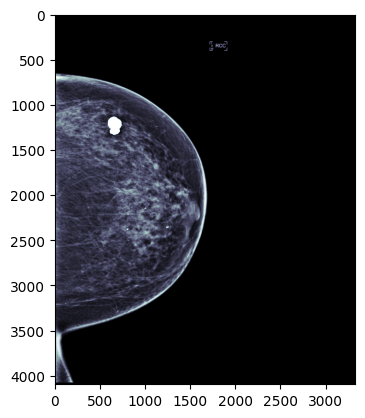

cancer: False
patient_id: 1468


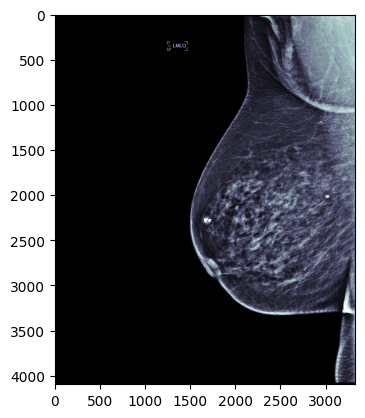

cancer: False
patient_id: 1468


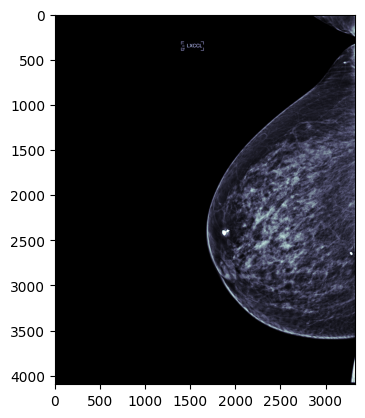

cancer: False
patient_id: 1468


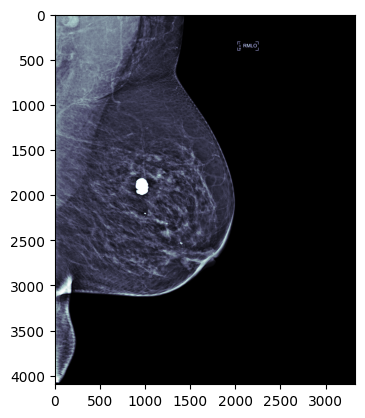

cancer: False
patient_id: 1468


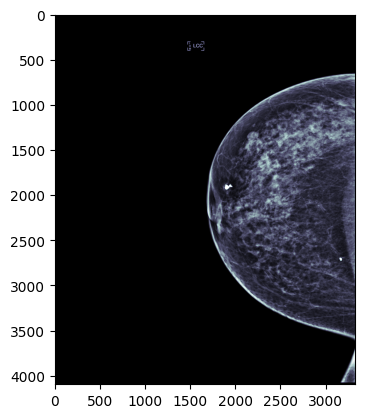

cancer: False
patient_id: 1468


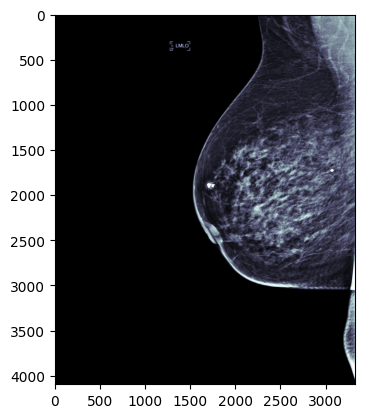

cancer: False
patient_id: 14791


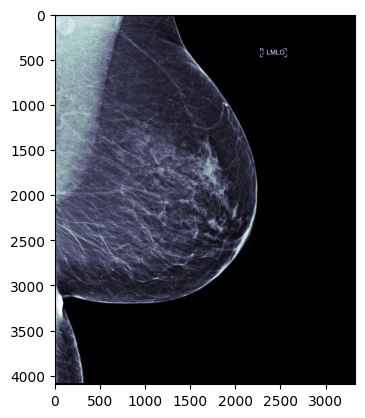

cancer: False
patient_id: 14791


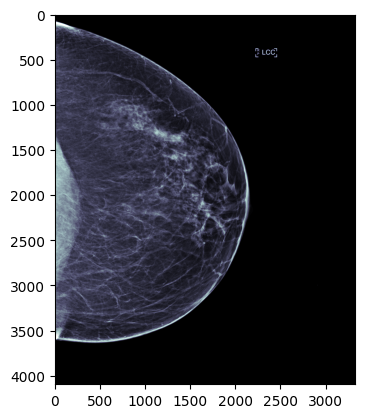

cancer: False
patient_id: 14791


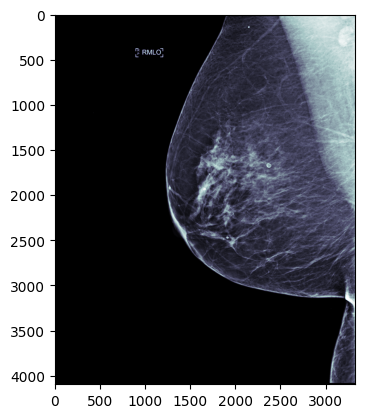

cancer: False
patient_id: 14791


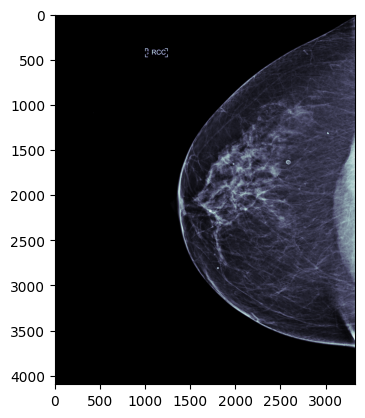

cancer: False
patient_id: 15136


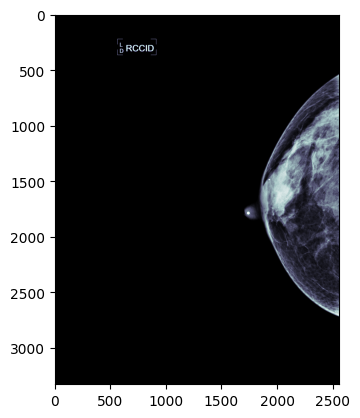

cancer: False
patient_id: 15136


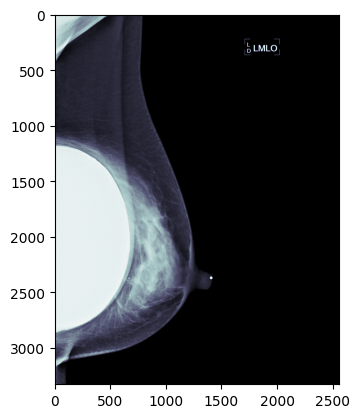

cancer: False
patient_id: 15136


KeyboardInterrupt: 

In [6]:
# image processing
for file in imagelist: #[:1]
    file_name = file_name_cut(file)
    key_value_pairs = dict(zip(meta_data_header, find_meta(meta_data, file_name)))
    if key_value_pairs["cancer"] == "1" or "0":
        print("cancer: " + boolean_string(key_value_pairs["cancer"]))
        print("patient_id: " + key_value_pairs["patient_id"])
        ds = dcmread(file)
        # print("File size is " + str(os.stat(file).st_size / (1024*1024)) + " MB")
        # convert to png to use the numpy code
        png_image = ds.pixel_array.astype(float)
        scaled_image = (np.maximum(png_image, 0) / png_image.max()) * 255.0
        # fractal_count(png_image)
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
        plt.show()
    
